In [1]:
import pandas as pd


In [2]:
df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")


In [3]:
print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')
Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')
Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


In [4]:
aadhaar_enrolment = pd.concat([df1, df2, df3], ignore_index=True)


In [5]:
aadhaar_enrolment.shape
aadhaar_enrolment.head()
aadhaar_enrolment.tail()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
1006028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


In [6]:
aadhaar_enrolment.to_csv("aadhaar_enrolment_combined.csv", index=False)


In [7]:
aadhaar = pd.read_csv("aadhaar_enrolment_combined.csv")

In [8]:
aadhaar.head()
aadhaar.info()
aadhaar.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [9]:
aadhaar.columns = aadhaar.columns.str.lower().str.replace(" ", "_")


In [10]:
aadhaar['date'] = pd.to_datetime(aadhaar['date'], errors='coerce')


In [11]:
aadhaar.isnull().sum()


,0
date,682238
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


In [12]:
aadhaar['date'].head(10)


,date
0,2025-02-03
1,2025-09-03
2,2025-09-03
3,2025-09-03
4,2025-09-03
5,2025-09-03
6,2025-09-03
7,2025-09-03
8,2025-09-03
9,2025-09-03


In [13]:
aadhaar['total_enrolment'] = (
    aadhaar['age_0_5'] +
    aadhaar['age_5_17'] +
    aadhaar['age_18_greater']
)


In [14]:
aadhaar[['state','date','total_enrolment']].head()


,state,date,total_enrolment
0,Meghalaya,2025-02-03,109
1,Karnataka,2025-09-03,86
2,Uttar Pradesh,2025-09-03,123
3,Uttar Pradesh,2025-09-03,106
4,Karnataka,2025-09-03,51


<Axes: title={'center': 'Aadhaar Enrolment Trend Over Time'}, xlabel='date'>

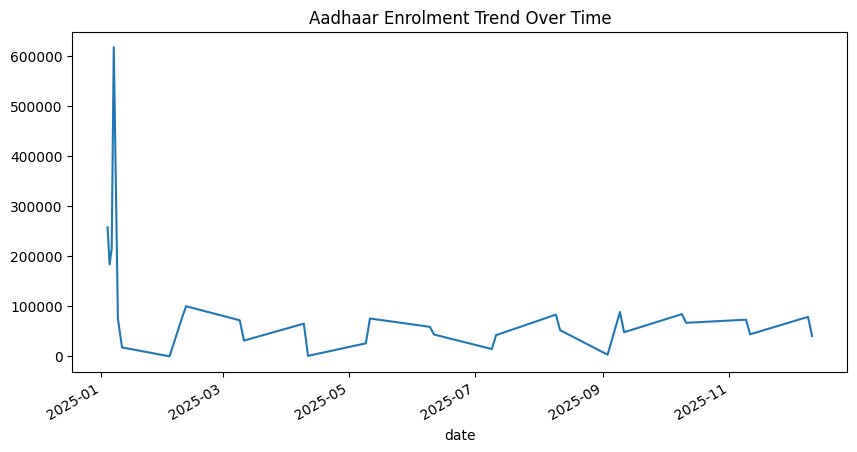

In [15]:
enrolment_time = aadhaar.groupby('date')['total_enrolment'].sum()

enrolment_time.plot(
    title="Aadhaar Enrolment Trend Over Time",
    figsize=(10,5)
)


<Axes: title={'center': 'Age-wise Aadhaar Enrolment Distribution'}>

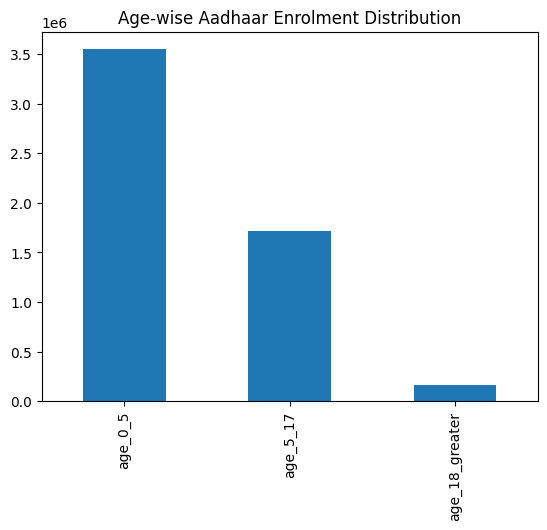

In [16]:
age_totals = aadhaar[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

age_totals.plot(
    kind='bar',
    title="Age-wise Aadhaar Enrolment Distribution"
)


<Axes: title={'center': 'Top 10 States by Aadhaar Enrolment'}, xlabel='state'>

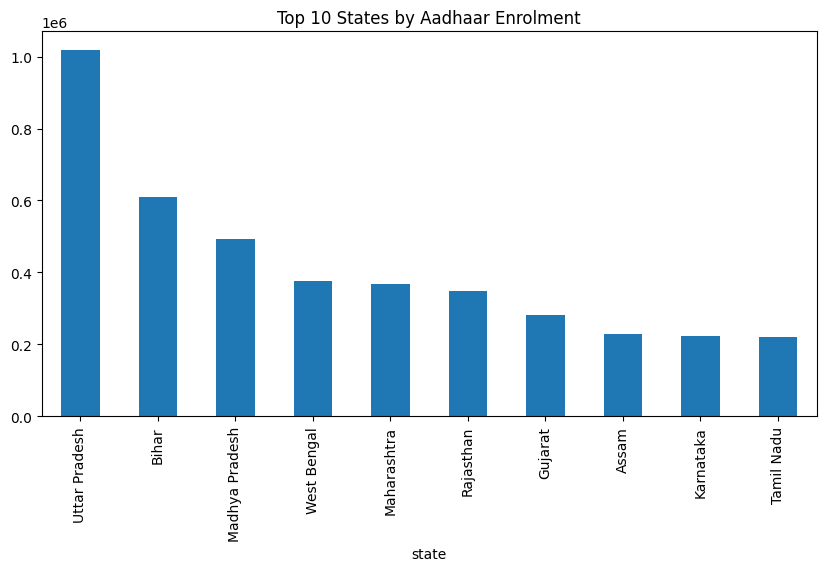

In [17]:
state_enrolment = (
    aadhaar.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_enrolment.plot(
    kind='bar',
    figsize=(10,5),
    title="Top 10 States by Aadhaar Enrolment"
)


<Axes: title={'center': 'Top 10 Districts by Aadhaar Enrolment'}, xlabel='district'>

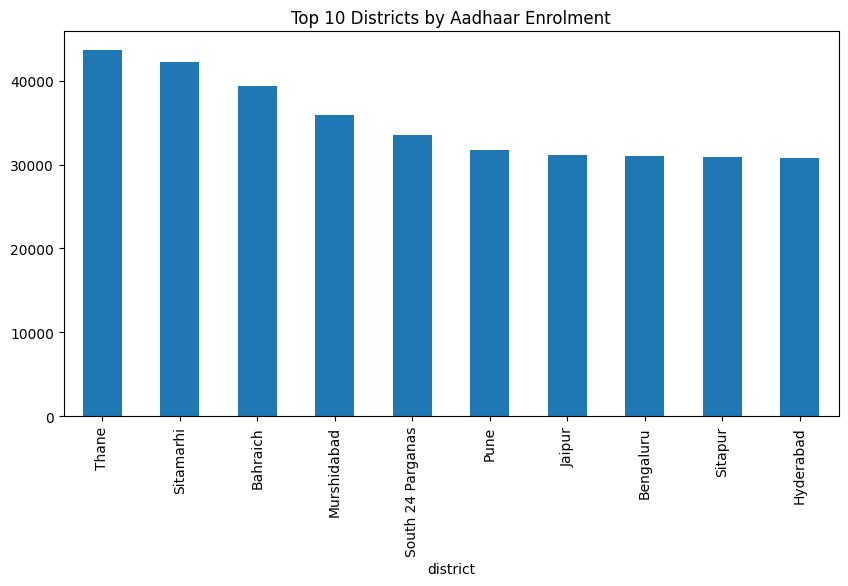

In [18]:
district_enrolment = (
    aadhaar.groupby('district')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

district_enrolment.plot(
    kind='bar',
    figsize=(10,5),
    title="Top 10 Districts by Aadhaar Enrolment"
)


In [19]:
monthly_enrolment = (
    aadhaar
    .groupby(aadhaar['date'].dt.to_period('M'))['total_enrolment']
    .sum()
)


In [20]:
monthly_enrolment.index = monthly_enrolment.index.to_timestamp()


<Axes: title={'center': 'Monthly Aadhaar Enrolment Trend'}, xlabel='date'>

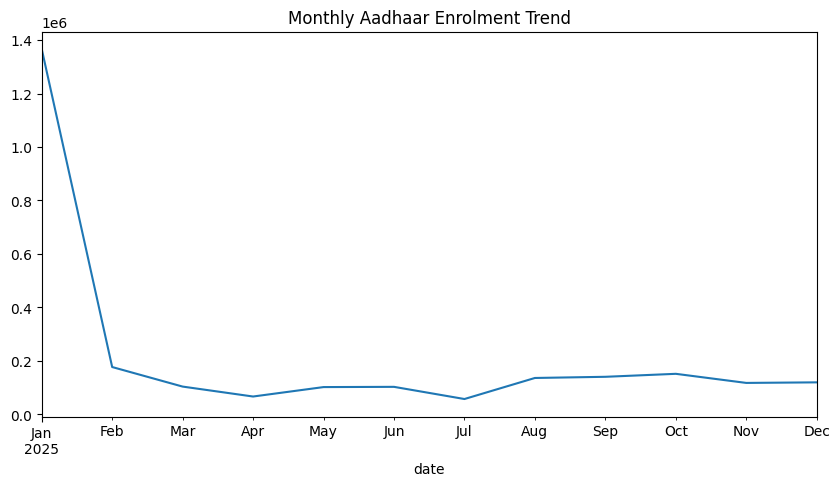

In [21]:
monthly_enrolment.plot(
    figsize=(10,5),
    title="Monthly Aadhaar Enrolment Trend"
)


In [22]:
change = monthly_enrolment.pct_change()

spikes = change[abs(change) > 0.5]   # 50% change threshold
spikes


,total_enrolment
date,
2025-02-01,-0.870709
2025-05-01,0.532069
2025-08-01,1.381975


In [23]:
aadhaar.to_csv("aadhaar_enrolment_final.csv", index=False)


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
os.makedirs('/content/drive/MyDrive/UIDAI_Hackathon', exist_ok=True)


In [6]:
os.listdir('/content/drive/MyDrive/UIDAI_Hackathon')


['api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv',
 'api_data_aadhar_demographic_500000_1000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv']

In [8]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_demographic_0_500000.csv')
df2 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_demographic_500000_1000000.csv')
df3 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_demographic_1000000_1500000.csv')
df4 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_demographic_1500000_2000000.csv')
df5 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_demographic_2000000_2071700.csv')

aadhaar_demo = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [9]:
aadhaar_demo.to_csv('/content/drive/MyDrive/UIDAI_Hackathon/aadhaar_demographic_combined.csv', index=False)


In [13]:
df1 = pd.read_csv("/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_enrolment_1000000_1006029.csv")

aadhaar = pd.concat([df1, df2, df3], ignore_index=True)


In [14]:
aadhaar.to_csv(
    "/content/drive/MyDrive/UIDAI_Hackathon/aadhaar_enrolment_combined.csv",
    index=False
)


In [15]:
aadhaar_demo = pd.read_csv(
    "/content/drive/MyDrive/UIDAI_Hackathon/aadhaar_demographic_combined.csv"
)

In [16]:
aadhaar_demo.head()
aadhaar_demo.info()
aadhaar_demo.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [17]:
aadhaar_demo.columns = aadhaar_demo.columns.str.lower().str.replace(" ", "_")
aadhaar_demo['date'] = pd.to_datetime(aadhaar_demo['date'], errors='coerce')


In [18]:
aadhaar_demo.info()
aadhaar_demo.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   state          object        
 2   district       object        
 3   pincode        int64         
 4   demo_age_5_17  int64         
 5   demo_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 94.8+ MB


,0
date,1187968
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


In [19]:
aadhaar_demo['total_demo_updates'] = (
    aadhaar_demo['demo_age_5_17'] +
    aadhaar_demo['demo_age_17_']
)


In [20]:
aadhaar_demo[['demo_age_5_17', 'demo_age_17_', 'total_demo_updates']].head()


,demo_age_5_17,demo_age_17_,total_demo_updates
0,49,529,578
1,22,375,397
2,65,765,830
3,24,314,338
4,45,785,830


<Axes: title={'center': 'Age-wise Distribution of Aadhaar Demographic Updates'}>

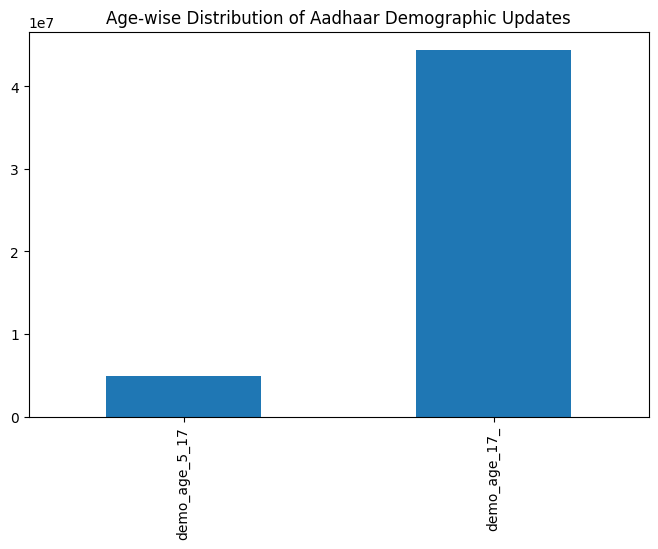

In [21]:
age_demo_totals = aadhaar_demo[['demo_age_5_17', 'demo_age_17_']].sum()

age_demo_totals.plot(
    kind='bar',
    figsize=(8,5),
    title="Age-wise Distribution of Aadhaar Demographic Updates"
)


<Axes: title={'center': 'Top 10 States by Demographic Updates'}, xlabel='state'>

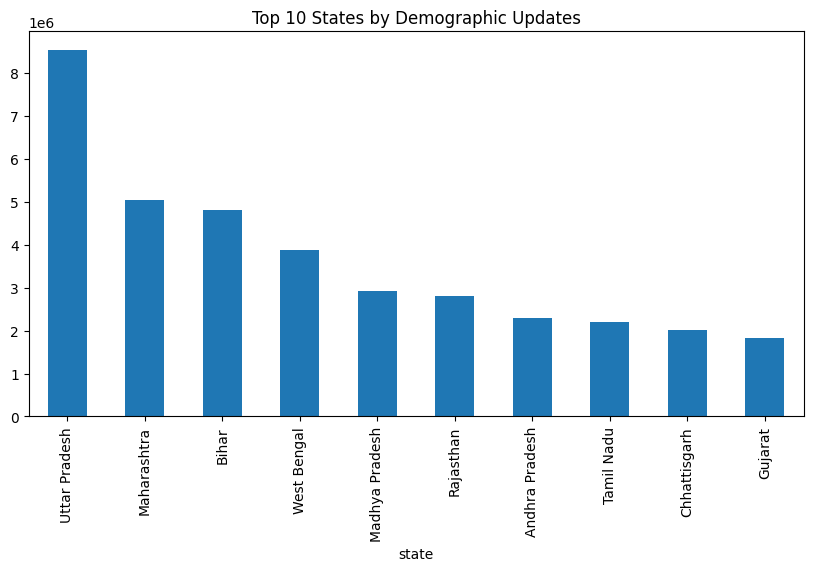

In [22]:
state_demo = (
    aadhaar_demo.groupby('state')['total_demo_updates']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_demo.plot(
    kind='bar',
    figsize=(10,5),
    title="Top 10 States by Demographic Updates"
)


<Axes: title={'center': 'Top 10 Districts by Demographic Updates'}, xlabel='district'>

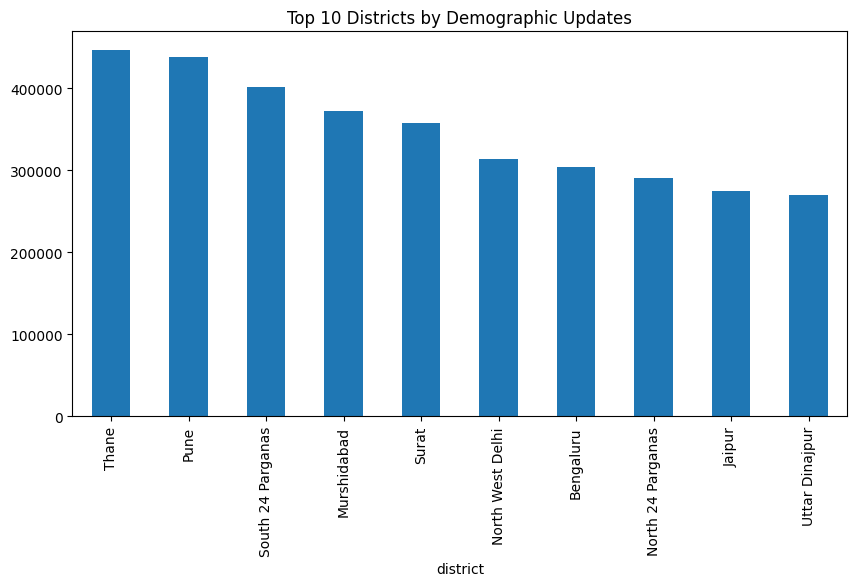

In [23]:
district_demo = (
    aadhaar_demo.groupby('district')['total_demo_updates']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

district_demo.plot(
    kind='bar',
    figsize=(10,5),
    title="Top 10 Districts by Demographic Updates"
)


<Axes: title={'center': 'Demographic Updates Over Time (Valid Dates Only)'}, xlabel='date'>

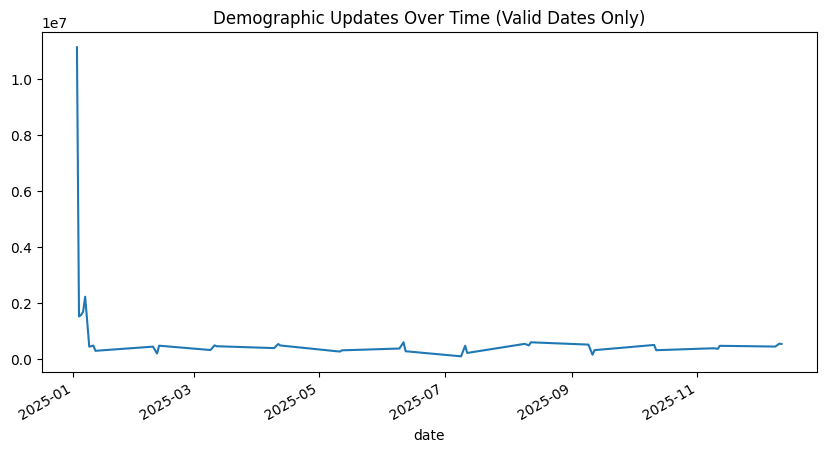

In [24]:
demo_time = (
    aadhaar_demo
    .dropna(subset=['date'])
    .groupby('date')['total_demo_updates']
    .sum()
)

demo_time.plot(
    figsize=(10,5),
    title="Demographic Updates Over Time (Valid Dates Only)"
)


In [26]:
import os
os.listdir('/content/drive/MyDrive/UIDAI_Hackathon')


['api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv',
 'api_data_aadhar_demographic_500000_1000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'aadhaar_demographic_combined.csv',
 'aadhaar_enrolment_combined.csv',
 'api_data_aadhar_biometric_500000_1000000.csv',
 'api_data_aadhar_biometric_0_500000.csv',
 'api_data_aadhar_biometric_1000000_1500000.csv',
 'api_data_aadhar_biometric_1500000_1861108.csv']

In [27]:
import pandas as pd

b1 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_biometric_0_500000.csv')
b2 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_biometric_500000_1000000.csv')
b3 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_biometric_1000000_1500000.csv')
b4 = pd.read_csv('/content/drive/MyDrive/UIDAI_Hackathon/api_data_aadhar_biometric_1500000_1861108.csv')


In [28]:
print(b1.columns)
print(b2.columns)
print(b3.columns)
print(b4.columns)


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')


In [29]:
aadhaar_bio = pd.concat([b1, b2, b3, b4], ignore_index=True)


In [30]:
aadhaar_bio.to_csv(
    '/content/drive/MyDrive/UIDAI_Hackathon/aadhaar_biometric_combined.csv',
    index=False
)


In [31]:
aadhaar_bio.head()
aadhaar_bio.info()
aadhaar_bio.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [32]:
aadhaar_bio.columns = aadhaar_bio.columns.str.lower().str.replace(" ", "_")
aadhaar_bio['date'] = pd.to_datetime(aadhaar_bio['date'], errors='coerce')


In [33]:
aadhaar_bio.isnull().sum()


,0
date,944100
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [34]:
aadhaar_bio['total_biometric_updates'] = (
    aadhaar_bio['bio_age_5_17'] +
    aadhaar_bio['bio_age_17_']
)


<Axes: title={'center': 'Age-wise Distribution of Aadhaar Biometric Updates'}>

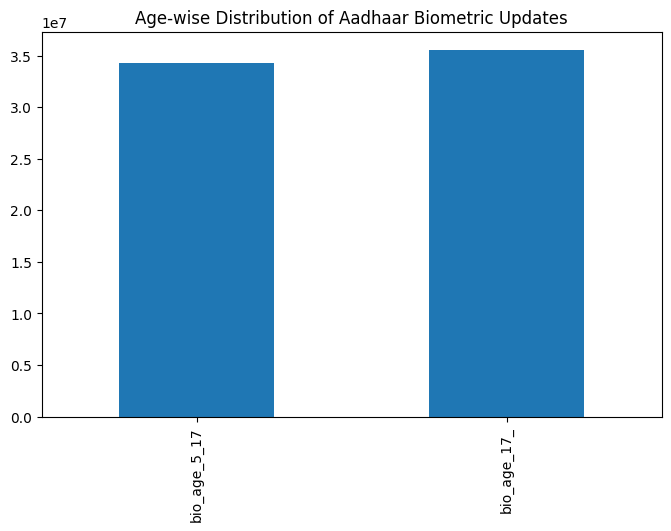

In [38]:
bio_age_totals = aadhaar_bio[['bio_age_5_17', 'bio_age_17_']].sum()

bio_age_totals.plot(
    kind='bar',
    figsize=(8,5),
    title="Age-wise Distribution of Aadhaar Biometric Updates"
)


<Axes: title={'center': 'Top 10 States by Aadhaar Biometric Updates'}, xlabel='state'>

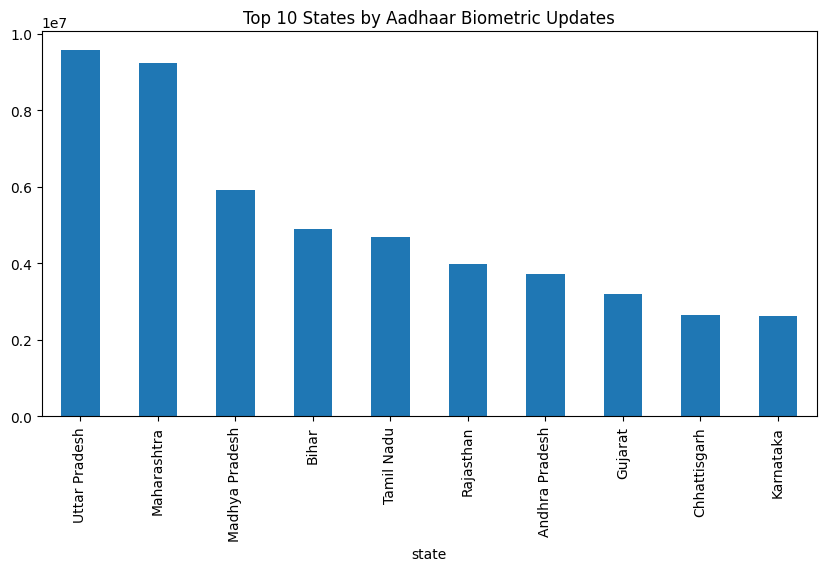

In [39]:
state_bio = (
    aadhaar_bio.groupby('state')['total_biometric_updates']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_bio.plot(
    kind='bar',
    figsize=(10,5),
    title="Top 10 States by Aadhaar Biometric Updates"
)


<Axes: title={'center': 'Top 10 Districts by Aadhaar Biometric Updates'}, xlabel='district'>

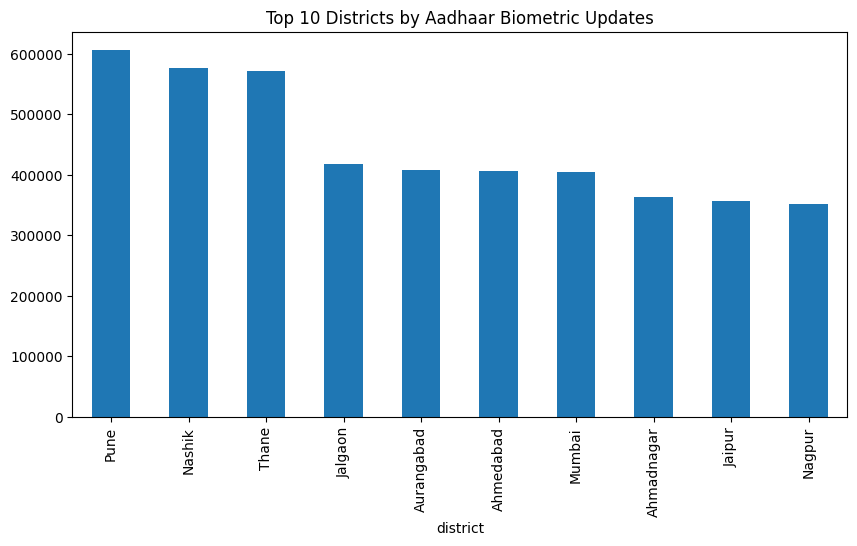

In [40]:
district_bio = (
    aadhaar_bio.groupby('district')['total_biometric_updates']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

district_bio.plot(
    kind='bar',
    figsize=(10,5),
    title="Top 10 Districts by Aadhaar Biometric Updates"
)


<Axes: title={'center': 'Biometric Updates Over Time (Valid Dates Only)'}, xlabel='date'>

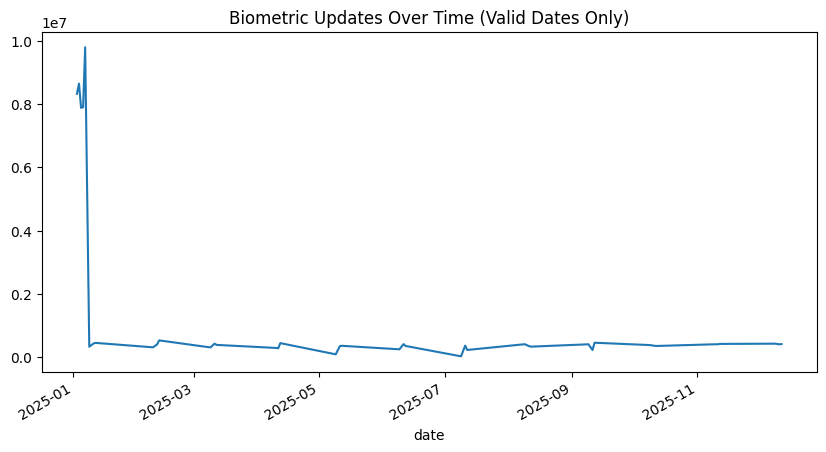

In [41]:
bio_time = (
    aadhaar_bio
    .dropna(subset=['date'])
    .groupby('date')['total_biometric_updates']
    .sum()
)

bio_time.plot(
    figsize=(10,5),
    title="Biometric Updates Over Time (Valid Dates Only)"
)
